<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [93]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [94]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [95]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [96]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [97]:
# Answer:df.sort_values(by=['col1'])
# creat a var to store the result of sorting the DF movies sorted by duration. 
short_movies = movies.sort_values(by='duration')
long_movies = movies.sort_values(by='duration', ascending=False) #same search. Just revesed the order. 

#long_movies.iloc[:10] I had used this first but just getting the head is easier
long_movies.head(1)


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [98]:
short_movies.head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5,0,'Movie Duration')

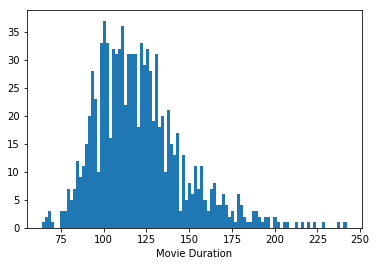

In [99]:
# Answer: Plot 
plt.hist(movies['duration'], bins=100)
plt.xlabel("Movie Duration")

#### Use a box plot to display that same data.

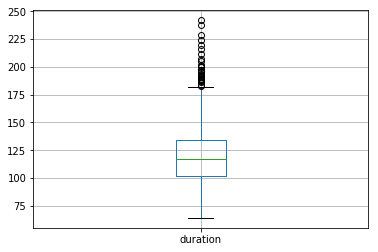

In [100]:
# Answer:postings.boxplot(column='price', by='location')
movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [101]:
# Answer:sur_perimetre[col].value_counts()
rating_count = movies['content_rating'].value_counts()
rating_count

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,0,'Movies')

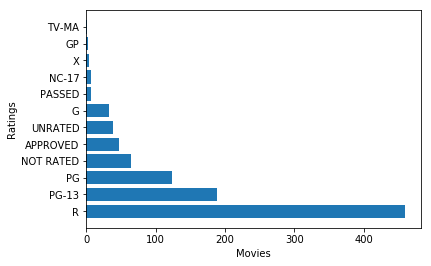

In [102]:
# Answer: This was my first attempt. I had to maually create the x and y axis becuse I was having trouble 
# using a temp DF to read the info into the graph.I then used PLT to plot a horizonal bar. I then added the x and y labels.

x_axis = ['R', 'PG-13', 'PG', 'NOT RATED', 'APPROVED', 'UNRATED', 'G', 'PASSED', 'NC-17', 'X', 'GP', 'TV-MA'] 
y_axis = [460, 189, 123, 65, 47, 38, 32, 7, 7, 4, 3, 1 ]

plt.barh(x_axis, y_axis)
plt.ylabel("Ratings")
plt.xlabel("Movies")

Text(0,0.5,'Count')

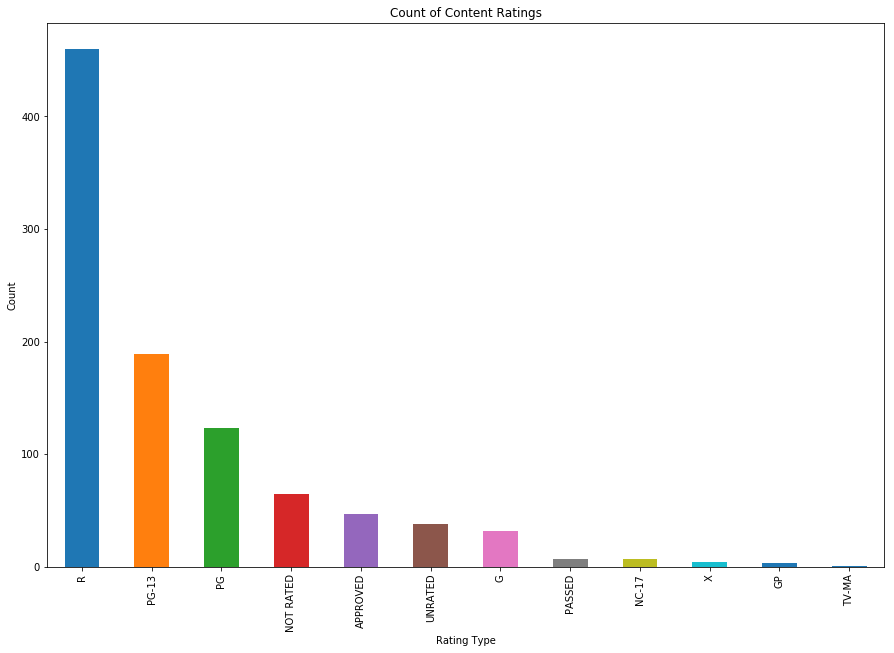

In [103]:
# Mo helped me. 
df = movies['content_rating'].value_counts()

ax = df.plot(kind='bar', figsize=(15,10), title ='Count of Content Ratings')
ax.set_xlabel('Rating Type')
ax.set_ylabel('Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [104]:
# Answer:df['User_id'] = df['User_id'].replace(0, 'is not empty')
# I first used this:
#movies['content_rating'] = movies['content_rating'].replace('NOT RATED', 'UNRATED')
#movies['content_rating'] = movies['content_rating'].replace('APPROVED', 'UNRATED')
#movies['content_rating'] = movies['content_rating'].replace('PASSED', 'UNRATED')
#movies['content_rating'] = movies['content_rating'].replace('GP', 'UNRATED')


# then I figured out you can do it all at one time taking the DF movies and its column content_rating and replace the strings
# in the list with UNRATED. inplace permanently replaces the value.

movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)
rating_count = movies['content_rating'].value_counts()
rating_count

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [105]:
# Answer: Same as obove.

movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)
rating_count = movies['content_rating'].value_counts()
rating_count

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [106]:
# Answer:df.isnull().sum(axis=1)

# first answered this with a for loop but this figuerd out I didnt need it. Funny. 

#for col in movies:
#    miss_val = movies.isnull().sum()
#miss_val

movies.isnull().sum()    

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [111]:
# Answer:df[df.isnull().any(axis=1)]

# using the DF movies display NaN values across rows within the DF

movies[movies.isnull().any(axis=1)]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [112]:
# Did a little research and found that the three movies were PG. So took the DF movies and filled in all 
#NaN with PG and then saved it as itsself. 

movies = movies.fillna('PG')
movies.isnull().sum() # add all the sum values by column


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [114]:
# Answer: Within the DF movies calulate the mean of the columns whos duration is greaterthan or equal to 120 min and print it. 
print(movies[movies.duration >= 120].star_rating.mean())
# Within the DF movies calulate the mean of the columns whos duration is less than 120 min and print it. 
print(movies[movies.duration < 120].star_rating.mean())   

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

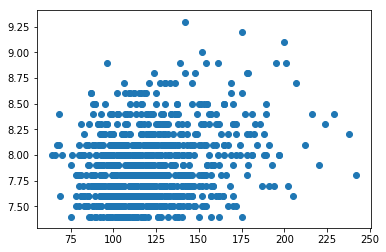

In [115]:
# Answer:
#First sucssess was creating the x and y varables then plot a scatter plot 
#x = movies.duration
#y = movies.star_rating
#plt.scatter(x, y)

# Then I found i can just designate the x and y with in the line. create a scatter plot using the DF movies and using its
#columns suration and star_rating as the x and y.

movies.plot(kind='scatter', x='duration', y='star_rating')
plt.xlabel('Duration')
plt.ylabel('Star Rating')

#### Calculate the average duration for each genre.

In [152]:
# Answer:Group the DF movies by genre and calculate the mean of each genres duration 
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3A94FF438>,
      dtype=object)

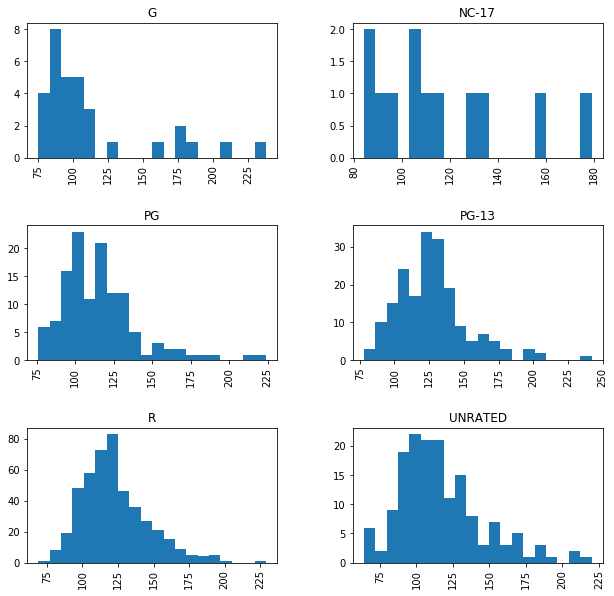

In [221]:
# Answer:
movies.hist(column = "duration",by= 'content_rating', bins=20, figsize=(10,10))


#### Determine the top rated movie (by star rating) for each genre.

In [225]:
# Answer:Display the movies sorted by star_rating and then by genre with coresponding title and star rating
movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].max()


,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [200]:
# Answer:Checked the DF movies for duplicate titles 
print(movies[movies.title.duplicated()].title)

#Created a varable to store the duplicate titles. Then desplayed the titles of movies 
#in the DF if they are also in the dup_movie varable

dup_entries = movies[movies.title.duplicated()].title
movies[movies.title.isin(dup_entries)]


# NOTE : They are different movies

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [203]:
# Answer:
print(movies.genre.value_counts()) # find which movies have at least 10 movies.

#Manualy build a list contaning of the genres of those movies
#Compare movies with that list and if there is a match group them by genre and calcualte thier mean

more_than_10_movies = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery' ]
movies[movies.genre.isin(more_than_10_movies)].groupby("genre").star_rating.mean()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [229]:
# Answer:
genre_count = movies.genre.value_counts() # Variable to store the count of movies for each genre
more_than_10_movies = genre_count[genre_count >= 10].index #second variable to store the index of each item in 
#genre count that is greater than 10

#Compare movies with top10_genres and if there is a match group them by genre and calcualte thier star_rating mean
movies[movies.genre.isin(more_than_10_movies)].groupby("genre").star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [316]:
# Answer
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [320]:
# Answer:
genre_agg = movies.groupby('genre').star_rating.agg(['count','mean'])
genre_agg[genre_agg['count']>=10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


#### BONUS: Figure out something "interesting" using the actors data!